In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
X = df.drop('TARGET CLASS',axis=1)
X

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [9]:
y=df.iloc[:,-1]
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[9] <= 1.214\ngini = 0.5\nsamples = 670\nvalue = [345, 325]'),
 Text(0.25, 0.625, 'x[3] <= 0.638\ngini = 0.349\nsamples = 373\nvalue = [289, 84]'),
 Text(0.125, 0.375, 'x[1] <= 0.841\ngini = 0.349\nsamples = 71\nvalue = [16, 55]'),
 Text(0.0625, 0.125, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.1875, 0.125, 'gini = 0.206\nsamples = 60\nvalue = [7, 53]'),
 Text(0.375, 0.375, 'x[1] <= 1.163\ngini = 0.174\nsamples = 302\nvalue = [273, 29]'),
 Text(0.3125, 0.125, 'gini = 0.06\nsamples = 259\nvalue = [251, 8]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 43\nvalue = [22, 21]'),
 Text(0.75, 0.625, 'x[1] <= 0.636\ngini = 0.306\nsamples = 297\nvalue = [56, 241]'),
 Text(0.625, 0.375, 'x[8] <= 0.768\ngini = 0.26\nsamples = 26\nvalue = [22, 4]'),
 Text(0.5625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6875, 0.125, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.875, 0.375, 'x[3] <= 1.228\ngini = 0.219\nsamples = 271\nvalue = [34, 237]')

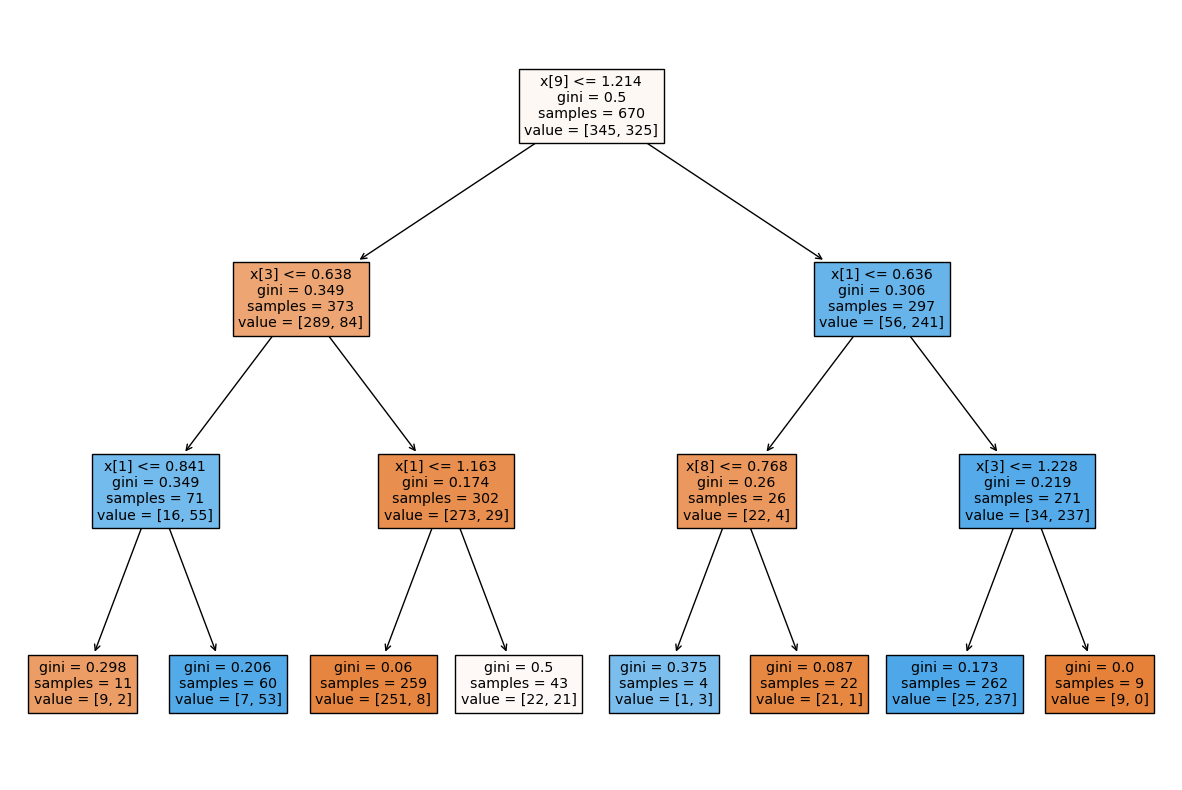

In [51]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [38]:
model.score(X_test,y_test)

0.8727272727272727

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[138,  17],
       [ 25, 150]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       155
           1       0.90      0.86      0.88       175

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330

